In [1]:
import os
import numpy as np
import pandas as pd
import time
import visual_behavior.database as db
import datetime
pd.set_option('display.max_columns', 500)
import visual_behavior.data_access.loading as loading
import visual_behavior_glm.GLM_analysis_tools as gat
from visual_behavior import database as db
import matplotlib.pyplot as plt
import seaborn as sns

%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


In [2]:
%%time
glm_version = '7_L2_optimize_by_session'
experiment_table = gat.get_experiment_table(glm_version=glm_version)

CPU times: user 1min 40s, sys: 15.1 s, total: 1min 55s
Wall time: 2min 46s


In [4]:
experiment_table.head()

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number,roi_count,_id,glm_version,filename,file_text,job_timestamp,required_walltime,required_mem,required_vmem,entry_time_utc,required_walltime_seconds,required_walltime_minutes,required_walltime_hours,dropout_count
0,953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_75,True,2,11,5f73b72187533762b370fc44,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 17:58:36-07:00,00:05:21,2689296,5550744,2020-09-30 00:55:30.972366,321,5.350000,0.089167,68.0
1,953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],150,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_150,True,2,23,5f73b721fd626775d9bba8e3,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 18:01:17-07:00,00:08:02,3365180,5743808,2020-09-30 00:55:30.904851,482,8.033333,0.133889,68.0
2,953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_225,True,2,15,5f73b728979e999afa0758b0,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 17:58:32-07:00,00:05:16,2849548,5492916,2020-09-30 00:55:31.055984,316,5.266667,0.087778,68.0
3,953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_225,True,2,14,5f73b72ee0efa57369fd31c9,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 17:58:34-07:00,00:05:18,2769580,5471656,2020-09-30 00:55:30.974072,318,5.300000,0.088333,68.0
4,958527474,954954402,953982960,1018028339,VisualBehaviorMultiscope,completed,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,858992726,850862430,F,210.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_75,True,3,10,5f73b732cb6036a9e06383c9,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 18:01:44-07:00,00:08:27,2255160,5594132,2020-09-30 00:55:30.798694,507,8.450000,0.140833,98.0


## some jobs don't have sufficient walltime to complete

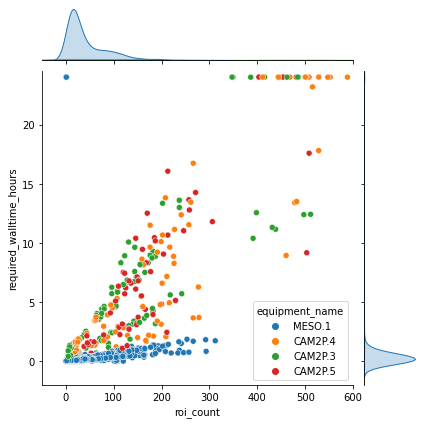

In [3]:
sns.jointplot(
    data = experiment_table.fillna(0),
    x='roi_count',
    y='required_walltime_hours',
    hue='equipment_name',
    xlim = (-50,600),
    ylim=(-2,24.5),
)

## it also looks like some jobs are running out of memory

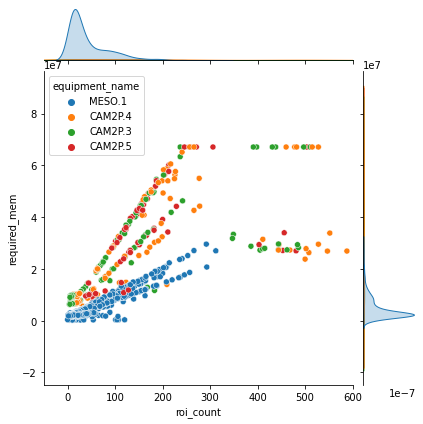

In [6]:
sns.jointplot(
    data = experiment_table.fillna(0),
    x='roi_count',
    y='required_mem',
    hue='equipment_name',
    xlim = (-50,600),
#     ylim=(-2,24.5),
)

In [7]:
experiment_table['required_mem'].max()

67108864